# Applications of MLP

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Diabetes Analysis
---

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
dataset = pd.read_csv('03-diabetes_prediction_dataset.csv')

In [5]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
pd.DataFrame(X, columns = ["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [8]:
pd.DataFrame(y, columns = ["diabetes"])

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [9]:
X

array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [10]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Encoding categorical data

Label Encoding the "Gender" column

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [12]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


In [26]:
X[0]

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 80.0, 0, 1, 25.19, 6.6, 140],
      dtype=object)

One Hot Encoding the "smoking_history" column

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print(X)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


### Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [17]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the second hidden layer


In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

### Adding the third hidden layer


In [20]:
# ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the fourth hidden layer


In [21]:
# ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# ann.add(tf.keras.layers.Dense(units=1, activation='relu'))

## Part 3 - Training the ANN

### Compiling the ANN

In [23]:
# layers
# 6 units relu
# 6 units relu
# output layer sigmoid

# ann.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])     # stayed pretty much the same at 91.5
# ann.compile(optimizer = 'adafactor', loss = 'binary_crossentropy', metrics = ['accuracy'])    # experimental
# ann.compile(optimizer = 'adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])      # 92.21 - 95.53
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])         # 95.85 - 96.61
# ann.compile(optimizer = 'adamw', loss = 'binary_crossentropy', metrics = ['accuracy'])        # error
# ann.compile(optimizer = 'ftrl', loss = 'binary_crossentropy', metrics = ['accuracy'])         # stuck at 91.50 at all times
# ann.compile(optimizer = 'lion', loss = 'binary_crossentropy', metrics = ['accuracy'])         # error
# ann.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])        # 95.24 - 96.04 2nd epoch to the end basically just stayed the same
# ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])      # 96.04 stayed the same from 1st to last epoch
# ann.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])          # 95.67 - 96.03 was very stagnant starting from epoch 19

# adam seems to be the best performing optimizer


### Training the ANN on the Training set

In [27]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
   1/2500 [..............................] - ETA: 20s - loss: 0.0652 - accuracy: 0.9688

2500/2500 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9614
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1052 - accuracy: 0.9614
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1050 - accuracy: 0.9616
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1049 - accuracy: 0.9614
Epoch 5/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9614
Epoch 6/100
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1044 - accuracy: 0.9619
Epoch 7/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9618
Epoch 8/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1040 - accuracy: 0.9619
Epoch 9/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1038 - accuracy: 0.9622
Epoch 10/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1037 

In [28]:
ann.optimizer

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 1s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

[[18284    13]
 [  554  1149]]


0.97165

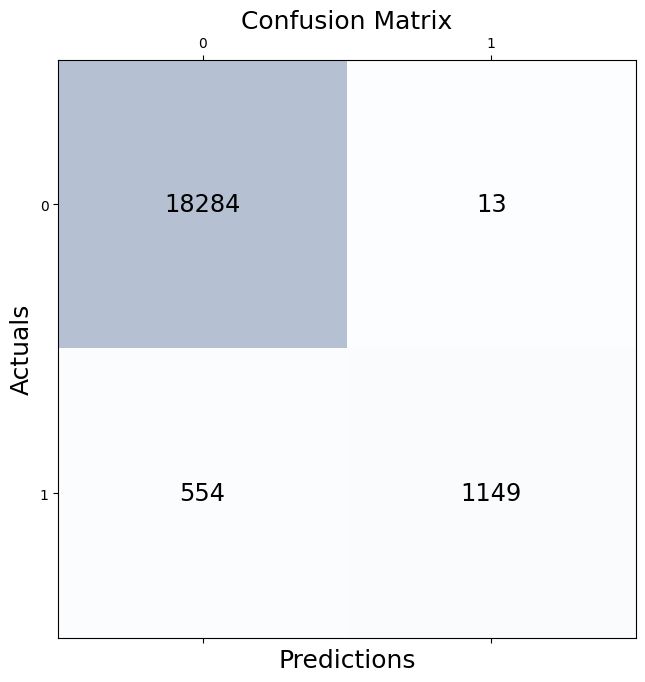

In [31]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

ann.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])     0 true positives, 0 false positive, 18297 on true negatives
ann.compile(optimizer = 'adafactor', loss = 'binary_crossentropy', metrics = ['accuracy'])    experimental
ann.compile(optimizer = 'adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])      92.21 - 95.53
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])         95.85 - 96.61
ann.compile(optimizer = 'adamw', loss = 'binary_crossentropy', metrics = ['accuracy'])        error
ann.compile(optimizer = 'ftrl', loss = 'binary_crossentropy', metrics = ['accuracy'])         0 true positives, 0 false positive, good true negative
ann.compile(optimizer = 'lion', loss = 'binary_crossentropy', metrics = ['accuracy'])         error
ann.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])        581 false negative, 198 false positive
ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])      517 false negative, 371 false positive, 1186 true positive
ann.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])          505 false negative, 382 false positive, 1198 true positive

In [32]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 6)                   84        
                                                                 
 dense_1 (Dense)             (32, 6)                   42        
                                                                 
 dense_2 (Dense)             (32, 1)                   7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Using adam optimizer
1. 3 layers - all relu
    - 0.97245
    - 0 false positives, 1152 true positive, 551 false negative
2. 3 layers - all sigmoid
    - 0.9702
    - 1149 true positives, 554 false negative, 42 false positive
2. 4 layers = 3 relu, last sigmoid
    - 0.9713
    - 1151 true positives, 552 false negative, 22 false positive
3. 5 layers = 4 relu, last sigmoid
    - 0.97165
    - 1143 true positives, 560 false negative, 7 false positive

## General Observation
Most correct predictions are on true negatives for all models

**Homework**
- Use the dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset.
- Experiment with the number of hidden layers, and the number of units in the hidden layer.
- Try to experiment on the activation functions in the hidden layer https://www.tensorflow.org/api_docs/python/tf/keras/activations
- Try to experiment with the optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Check the accuracy, specificity, and sensitivity of your model.